In [45]:
import pandas as pd
import zipfile
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [71]:
# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"

# Downloading the zip file
response = requests.get(url)
if response.status_code == 200:
    print("✅ Dataset downloaded successfully!")
else:
    print("❌ Failed to download dataset. Status code:", response.status_code)

# Extracting the CSV file from the zip
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall("../data")  # saves files into your 'data' folder
    print("✅ Files extracted to data/ folder")


✅ Dataset downloaded successfully!
✅ Files extracted to data/ folder


In [72]:
df = pd.read_csv("C:/Users/Dell Ultrabook/Desktop/readmission/data/dataset_diabetes/diabetic_data.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (101766, 50)


encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [73]:
df.replace("?", np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [75]:
df.describe(include='all').T.head(20)

count unique               top   freq  \
encounter_id              101766.0    NaN               NaN    NaN   
patient_nbr               101766.0    NaN               NaN    NaN   
race                         99493      5         Caucasian  76099   
gender                      101766      3            Female  54708   
age                         101766     10           [70-80)  26068   
weight                        3197      9          [75-100)   1336   
admission_type_id         101766.0    NaN               NaN    NaN   
discharge_disposition_id  101766.0    NaN               NaN    NaN   
admission_source_id       101766.0    NaN               NaN    NaN   
time_in_hospital          101766.0    NaN               NaN    NaN   
payer_code                   61510     17                MC  32439   
medical_specialty            51817     72  InternalMedicine  14635   
num_lab_procedures        101766.0    NaN               NaN    NaN   
num_procedures            101766.0    NaN               NaN    NaN   
num_medications           101766.0    NaN               NaN    NaN   
number_outpatient         101766.0    NaN               NaN    NaN   
number_emergency          101766.0    NaN               NaN    NaN   
number_inpatient          101766.0    NaN               NaN    NaN   
diag_1                      101745    716               428   6862   
diag_2                      101408    748               276   6752   

                                      mean               std      min  \
encounter_id              165201645.622978  102640295.983457  12522.0   
patient_nbr                54330400.694947   38696359.346534    135.0   
race                                   NaN               NaN      NaN   
gender                                 NaN               NaN      NaN   
age                                    NaN               NaN      NaN   
weight                                 NaN               NaN      NaN   
admission_type_id                 2.024006          1.445403      1.0   
discharge_disposition_id          3.715642          5.280166      1.0   
admission_source_id               5.754437          4.064081      1.0   
time_in_hospital                  4.395987          2.985108      1.0   
payer_code                             NaN               NaN      NaN   
medical_specialty                      NaN               NaN      NaN   
num_lab_procedures               43.095641         19.674362      1.0   
num_procedures                     1.33973          1.705807      0.0   
num_medications                  16.021844          8.127566      1.0   
number_outpatient                 0.369357          1.267265      0.0   
number_emergency                  0.197836          0.930472      0.0   
number_inpatient                  0.635566          1.262863      0.0   
diag_1                                 NaN               NaN      NaN   
diag_2                                 NaN               NaN      NaN   

                                 25%          50%          75%          max  
encounter_id              84961194.0  152388987.0  230270887.5  443867222.0  
patient_nbr               23413221.0   45505143.0  87545949.75  189502619.0  
race                             NaN          NaN          NaN          NaN  
gender                           NaN          NaN          NaN          NaN  
age                              NaN          NaN          NaN          NaN  
weight                           NaN          NaN          NaN          NaN  
admission_type_id                1.0          1.0          3.0          8.0  
discharge_disposition_id         1.0          1.0          4.0         28.0  
admission_source_id              1.0          7.0          7.0         25.0  
time_in_hospital                 2.0          4.0          6.0         14.0  
payer_code                       NaN          NaN          NaN          NaN  
medical_specialty                NaN          NaN          NaN          NaN  
num_lab_pr

weight               98569
max_glu_serum        96420
A1Cresult            84748
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
dtype: int64


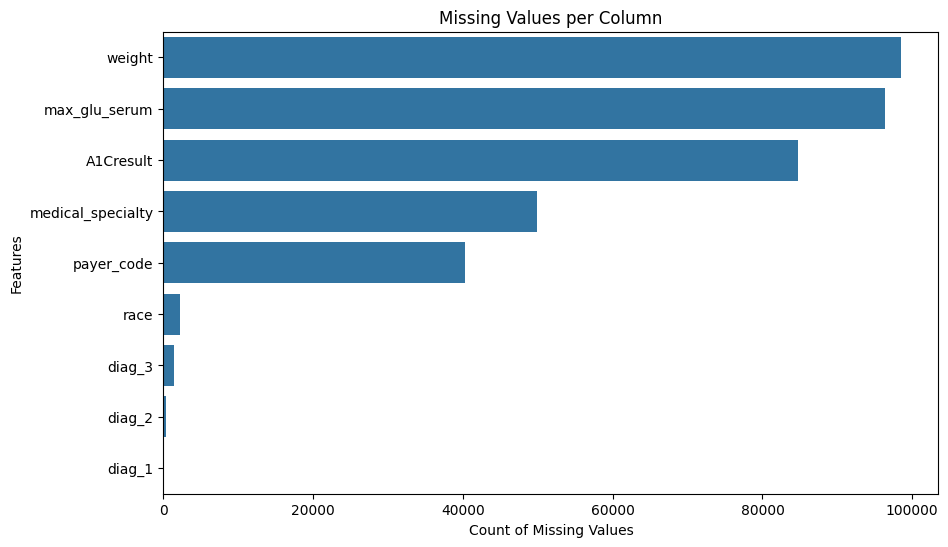

In [76]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Features")
plt.show()


In [77]:
df.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [78]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [79]:
df['race'].fillna('Unknown', inplace=True)
df[['diag_1', 'diag_2', 'diag_3']] = df[['diag_1', 'diag_2', 'diag_3']].fillna('Unknown')
df[['max_glu_serum', 'A1Cresult']] = df[['max_glu_serum', 'A1Cresult']].fillna('None')
df.isnull().sum().sort_values(ascending=False).head(10)

C:\Users\Dell Ultrabook\AppData\Local\Temp\ipykernel_18492\551359676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna('Unknown', inplace=True)


encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
dtype: int64

## EDA

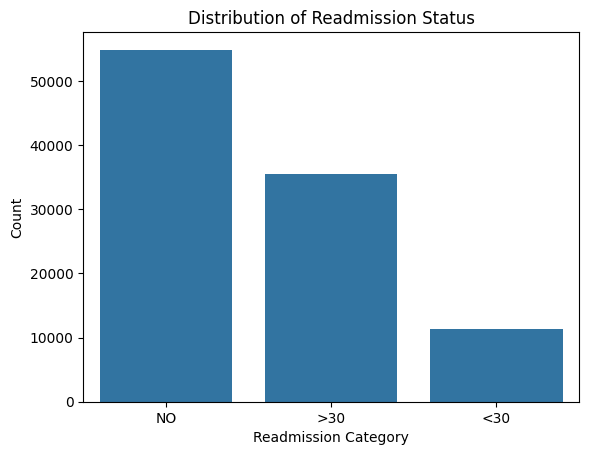

readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64

In [55]:
sns.countplot(x='readmitted', data=df)
plt.title("Distribution of Readmission Status")
plt.xlabel("Readmission Category")
plt.ylabel("Count")
plt.show()

df['readmitted'].value_counts(normalize=True) * 100  


In [56]:
print(df.columns.tolist())

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


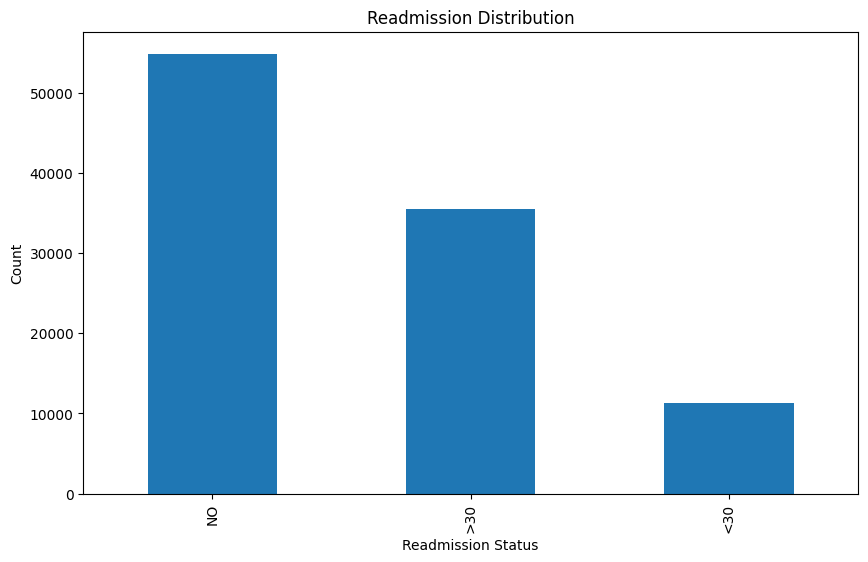

<Figure size 1200x600 with 0 Axes>

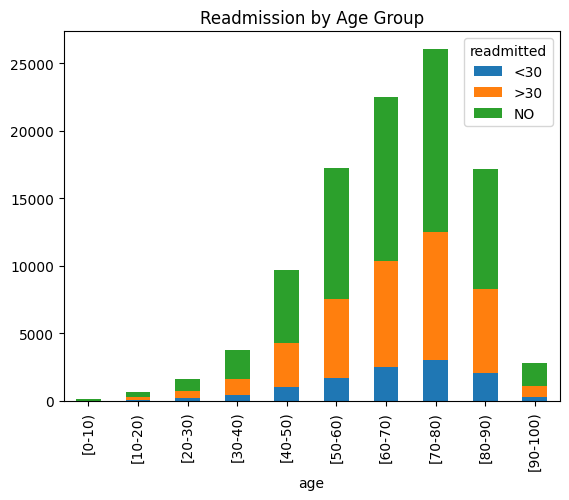

<Figure size 1200x600 with 0 Axes>

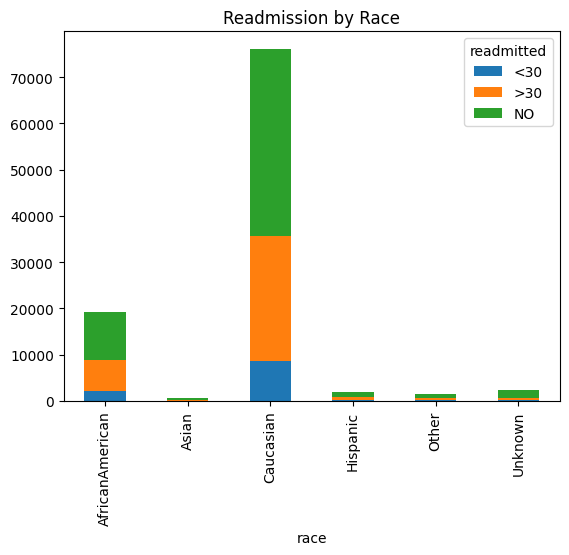

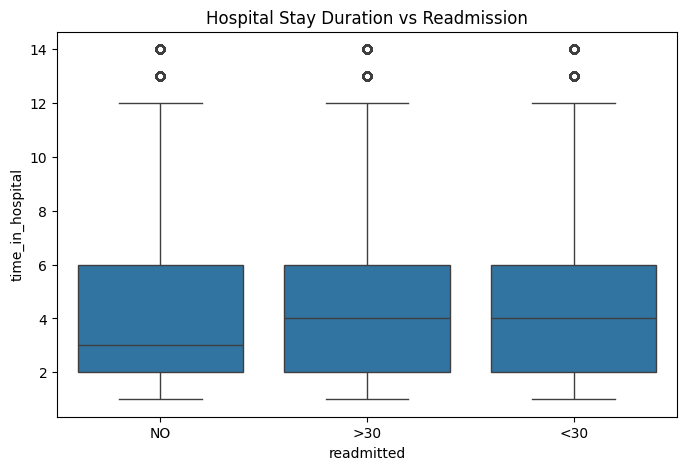

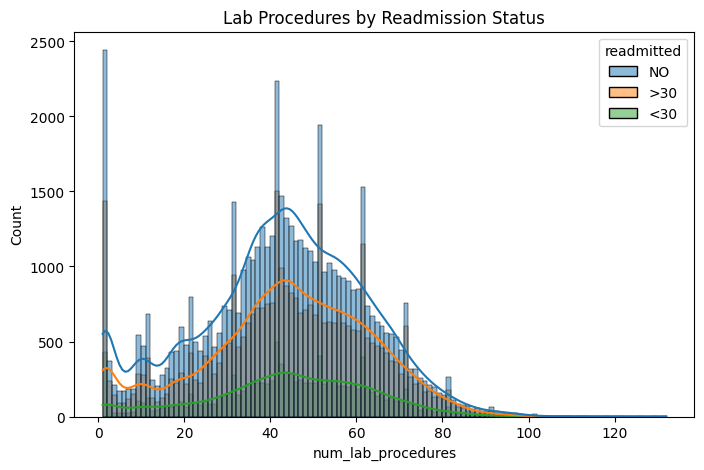

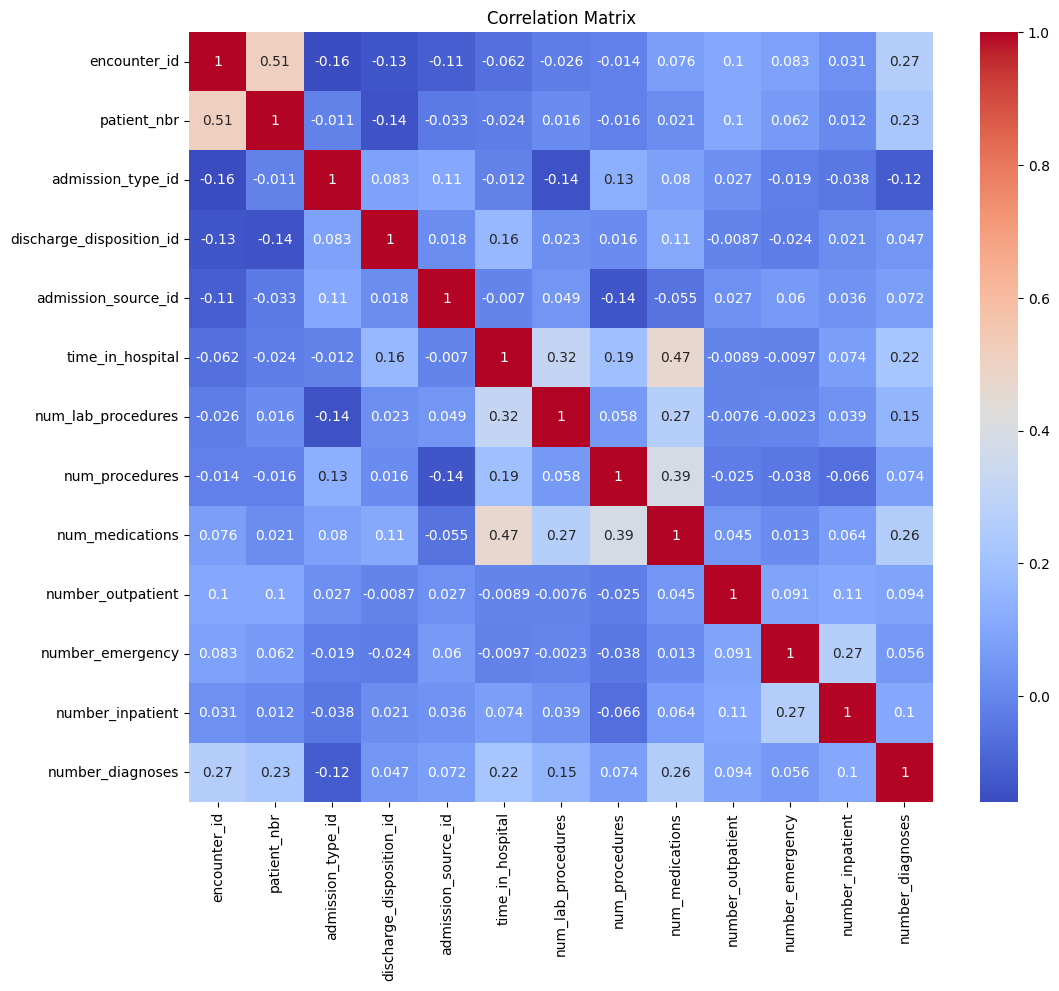

In [57]:
def perform_eda(df):
    """Comprehensive exploratory data analysis"""
    
    # Target variable distribution
    plt.figure(figsize=(10, 6))
    df['readmitted'].value_counts().plot(kind='bar')
    plt.title('Readmission Distribution')
    plt.xlabel('Readmission Status')
    plt.ylabel('Count')
    plt.show()
    
    # Age distribution vs readmission
    plt.figure(figsize=(12, 6))
    pd.crosstab(df['age'], df['readmitted']).plot(kind='bar', stacked=True)
    plt.title('Readmission by Age Group')
    plt.show()
    
    # # Medical specialty analysis
    # plt.figure(figsize=(15, 8))
    # df['medical_specialty'].value_counts().head(10).plot(kind='bar')
    # plt.title('Top 10 Medical Specialties')
    # plt.xticks(rotation=45)
    # plt.show()

    # Race distribution vs readmission
    plt.figure(figsize=(12, 6))
    pd.crosstab(df['race'], df['readmitted']).plot(kind='bar', stacked=True)
    plt.title('Readmission by Race')
    plt.show()

    # Time in hospital vs readmission
    plt.figure(figsize=(8,5))
    sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
    plt.title("Hospital Stay Duration vs Readmission")
    plt.show()

    # Number of lab procedures vs readmission
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x='num_lab_procedures', hue='readmitted', kde=True)
    plt.title("Lab Procedures by Readmission Status")
    plt.show()

    
    # Correlation analysis for numerical features
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Run EDA
perform_eda(df)

## Fature Encoding

In [95]:
from sklearn.preprocessing import LabelEncoder

# Copy original DataFrame
df_encoded = df.copy()

# -------------------------------
# STEP 1: Create binary target variable
# -------------------------------
df_encoded['readmitted_flag'] = df_encoded['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# -------------------------------
# STEP 2: Remove the target column BEFORE encoding
# -------------------------------
df_encoded.drop(columns=['readmitted'], inplace=True)

# -------------------------------
# STEP 3: Encode binary columns
# -------------------------------
binary_cols = ['change', 'diabetesMed']
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# -------------------------------
# STEP 4: One-hot encode categorical columns
# -------------------------------
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 2339 entries, encounter_id to metformin-pioglitazone_Steady
dtypes: bool(2323), int64(16)
memory usage: 237.9 MB


In [96]:
df.head()

encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  num_lab_procedures  ...  insulin  glyburide-metformin  \
0                 1                  41  ...       No                   No   
1                 3                  59  ...       Up                   No   
2                 2                  11  ...       No                   No   
3                 2                  44  ...       Up                   No   
4                 1                  51  ...   Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

  metformin-pioglitazone change diabetesMed  readmitted readmitted_flag  
0                     No     No          No          NO               0  
1                     No     Ch         Yes         >30               0  
2                     No     No         Yes          NO               0  
3                     No     Ch         Yes          NO               0  
4                     No     Ch         Yes          NO               0  

[5 rows x 48 columns]

In [97]:
df_encoded.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 2337 entries, admission_type_id to metformin-pioglitazone_Steady
dtypes: bool(2323), int64(14)
memory usage: 236.3 MB


In [98]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [99]:
# X_train.to_csv('../data/X_train_scaled.csv', index=False)
# X_test.to_csv('../data/X_test_scaled.csv', index=False)
# y_train.to_csv('../data/y_train.csv', index=False)
# y_test.to_csv('../data/y_test.csv', index=False)


In [100]:
# Recreate the binary target from original column
df['readmitted_flag'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# If you had one-hot encoded df before, ensure the target is reattached correctly
df_encoded = df_encoded.drop(columns=['readmitted_flag'], errors='ignore')
df_encoded['readmitted_flag'] = df['readmitted_flag']

# Split into features and target
X = df_encoded.drop(columns=['readmitted_flag'])
y = df_encoded['readmitted_flag']

# Confirm the target
print(y.value_counts())


readmitted_flag
0    90409
1    11357
Name: count, dtype: int64


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (not target!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [103]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability for class 1

c:\Users\Dell Ultrabook\Desktop\readmission\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Dell Ultrabook\Desktop\readmission\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Accuracy: 0.8885
Precision: 0.5238
Recall: 0.0048
F1-score: 0.0096
ROC-AUC: 0.6507


In [105]:
y.value_counts(normalize=True)

readmitted_flag
0    0.888401
1    0.111599
Name: proportion, dtype: float64

In [106]:
log_reg_balanced = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg_balanced.fit(X_train_scaled, y_train)
y_pred_balanced = log_reg_balanced.predict(X_test_scaled)

In [107]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_balanced))
print("ROC-AUC:", roc_auc_score(y_test, log_reg_balanced.predict_proba(X_test_scaled)[:, 1]))


              precision    recall  f1-score   support

           0       0.92      0.65      0.76     18083
           1       0.16      0.55      0.25      2271

    accuracy                           0.64     20354
   macro avg       0.54      0.60      0.51     20354
weighted avg       0.84      0.64      0.70     20354

ROC-AUC: 0.637249107197929


In [109]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_res, y_res)

y_pred_smote = log_reg_smote.predict(X_test_scaled)
print(classification_report(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, log_reg_smote.predict_proba(X_test_scaled)[:, 1]))


              precision    recall  f1-score   support

           0       0.92      0.64      0.76     18083
           1       0.16      0.55      0.25      2271

    accuracy                           0.63     20354
   macro avg       0.54      0.60      0.50     20354
weighted avg       0.83      0.63      0.70     20354

ROC-AUC: 0.6318160647416375


In [110]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200, 
    random_state=42, 
    class_weight='balanced'
)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1]))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.64      0.00      0.01      2271

    accuracy                           0.89     20354
   macro avg       0.76      0.50      0.47     20354
weighted avg       0.86      0.89      0.84     20354

ROC-AUC: 0.6586383819041962
